# **Dataset-1 (data.csv)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
df = pd.read_csv("/content/data.csv")
df1 = df.copy()
df1.head(5)

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1


In [2]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   bin_1   10 non-null     object
 2   bin_2   10 non-null     object
 3   City    10 non-null     object
 4   Ord_1   10 non-null     object
 5   Ord_2   10 non-null     object
 6   Target  10 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 688.0+ bytes


id        0
bin_1     0
bin_2     0
City      0
Ord_1     0
Ord_2     0
Target    0
dtype: int64

<Axes: xlabel='Ord_2', ylabel='count'>

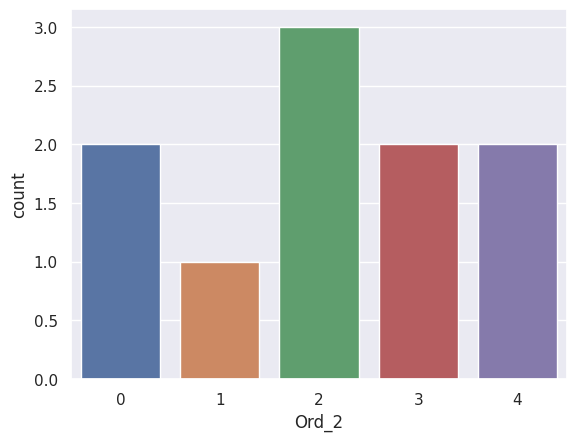

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Ord_2'] = le.fit_transform(df['Ord_2'])
sbn.set(style ="darkgrid")
sbn.countplot(x ='Ord_2', data = df)

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = enc.fit_transform(df[['City']]).toarray()
encoded_colm = pd.DataFrame(enc)
df = pd.concat([df, encoded_colm], axis=1)
df = df.drop(['City'], axis=1)
df.head(10)

,id,bin_1,bin_2,Ord_1,Ord_2,Target,0,1,2,3
0,0,F,N,Hot,2,0,0.0,0.0,1.0,0.0
1,1,F,Y,Warm,3,1,1.0,0.0,0.0,0.0
2,2,M,N,Very Hot,1,1,0.0,0.0,0.0,1.0
3,3,M,Y,Cold,0,0,0.0,1.0,0.0,0.0
4,4,M,Y,Cold,0,1,0.0,0.0,1.0,0.0
5,5,F,N,Very Hot,3,0,0.0,0.0,1.0,0.0
6,6,M,N,Warm,4,1,0.0,1.0,0.0,0.0
7,7,F,N,Hot,2,1,0.0,1.0,0.0,0.0
8,8,M,N,Very Hot,2,0,0.0,0.0,1.0,0.0
9,9,F,Y,Warm,4,0,0.0,0.0,1.0,0.0


In [5]:
df = pd.get_dummies(df, prefix=['Ord_2'], columns=['Ord_2'])
df.head(10)

,id,bin_1,bin_2,Ord_1,Target,0,1,2,3,Ord_2_0,Ord_2_1,Ord_2_2,Ord_2_3,Ord_2_4
0,0,F,N,Hot,0,0.0,0.0,1.0,0.0,0,0,1,0,0
1,1,F,Y,Warm,1,1.0,0.0,0.0,0.0,0,0,0,1,0
2,2,M,N,Very Hot,1,0.0,0.0,0.0,1.0,0,1,0,0,0
3,3,M,Y,Cold,0,0.0,1.0,0.0,0.0,1,0,0,0,0
4,4,M,Y,Cold,1,0.0,0.0,1.0,0.0,1,0,0,0,0
5,5,F,N,Very Hot,0,0.0,0.0,1.0,0.0,0,0,0,1,0
6,6,M,N,Warm,1,0.0,1.0,0.0,0.0,0,0,0,0,1
7,7,F,N,Hot,1,0.0,1.0,0.0,0.0,0,0,1,0,0
8,8,M,N,Very Hot,0,0.0,0.0,1.0,0.0,0,0,1,0,0
9,9,F,Y,Warm,0,0.0,0.0,1.0,0.0,0,0,0,0,1


In [6]:
df = pd.get_dummies(df, prefix=['Ord_1'], columns=['Ord_1'])
df.head(10)

,id,bin_1,bin_2,Target,0,1,2,3,Ord_2_0,Ord_2_1,Ord_2_2,Ord_2_3,Ord_2_4,Ord_1_Cold,Ord_1_Hot,Ord_1_Very Hot,Ord_1_Warm
0,0,F,N,0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,1,0,0
1,1,F,Y,1,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1
2,2,M,N,1,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,1,0
3,3,M,Y,0,0.0,1.0,0.0,0.0,1,0,0,0,0,1,0,0,0
4,4,M,Y,1,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0
5,5,F,N,0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0
6,6,M,N,1,0.0,1.0,0.0,0.0,0,0,0,0,1,0,0,0,1
7,7,F,N,1,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0
8,8,M,N,0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1,0
9,9,F,Y,0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,1


# **Dataset-2 (Encoding data.csv)**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Encoding Data.csv")
df1 = df.copy()
df1.head(5)

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold


In [9]:
df = pd.get_dummies(df, columns = ['bin_1','bin_2'])
df

,id,nom_0,ord_2,bin_1_F,bin_1_T,bin_2_N,bin_2_Y
0,0,Red,Hot,1,0,1,0
1,1,Blue,Warm,1,0,0,1
2,2,Blue,Cold,1,0,1,0
3,3,Green,Warm,1,0,1,0
4,4,Red,Cold,0,1,1,0
5,5,Green,Hot,0,1,1,0
6,6,Red,Cold,1,0,1,0
7,7,Red,Cold,0,1,1,0
8,8,Blue,Warm,1,0,1,0
9,9,Red,Hot,1,0,0,1


In [10]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, OneHotEncoder
climate = ['Cold','Warm','Hot']
enc = OrdinalEncoder(categories = [climate])
enc.fit_transform(df1[["ord_2"]])

array([[2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.]])

In [11]:
df1['Ord_2'] = enc.fit_transform(df1[["ord_2"]])
df1.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2
0,0,F,N,Red,Hot,2.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,0.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,0.0


In [12]:
df2 = df1.copy()
le = LabelEncoder()
df2['Nom_0'] = le.fit_transform(df2[["nom_0"]])
df2.head(5)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


In [13]:
df3 = df2.copy()
oe = OneHotEncoder()
oe.fit_transform(df3[["bin_1"]])
df3.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


In [14]:
df4 = df3.copy()
oe = OneHotEncoder()
oe.fit_transform(df4[["bin_2"]])
df4.head(5)

,id,bin_1,bin_2,nom_0,ord_2,Ord_2,Nom_0
0,0,F,N,Red,Hot,2.0,2
1,1,F,Y,Blue,Warm,1.0,0
2,2,F,N,Blue,Cold,0.0,0
3,3,F,N,Green,Warm,1.0,1
4,4,T,N,Red,Cold,0.0,2


<Axes: xlabel='ord_2', ylabel='count'>

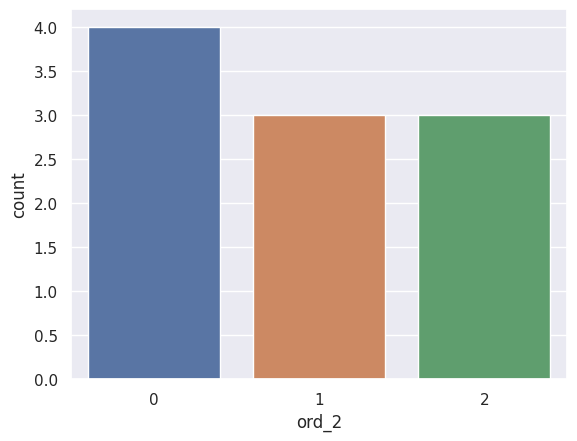

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ord_2'] = le.fit_transform(df['ord_2'])
sbn.set(style ="darkgrid")
sbn.countplot(x ='ord_2', data = df)

# **Dataset-3 (titanic_dataset.csv)**

In [16]:
import pandas as pd
import numpy as np
import seaborn as sbn
df = pd.read_csv("/content/titanic_dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Age']=df['Age'] . fillna(df['Age'].mean())
df['Cabin']=df['Cabin']. fillna(df['Cabin']. mode() [0])
df['Embarked']=df['Embarked'] . fillna(df['Embarked'].mode( )[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

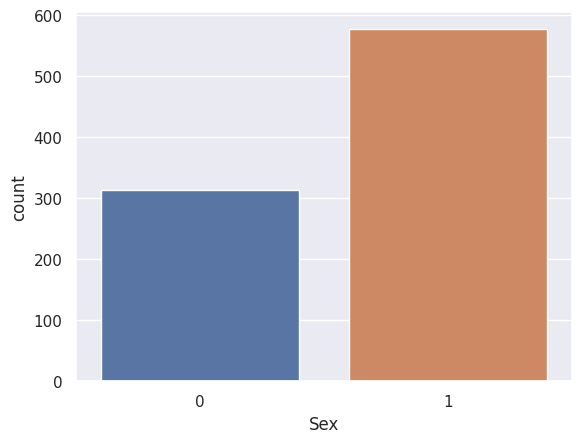

In [19]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['Sex'] = lc.fit_transform(df['Sex'])
sbn.set(style ="darkgrid")
sbn.countplot(x ='Sex', data = df)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder()
enc= enc.fit_transform(df[['Name']]).toarray()
encoded_colm = pd.DataFrame(enc)
df= pd.concat([df, encoded_colm], axis=1)
df= df.drop(['Name'], axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,881,882,883,884,885,886,887,888,889,890
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,C85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,0,35.000000,1,0,113803,53.1000,C123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,1,35.000000,0,0,373450,8.0500,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0,3,1,29.699118,0,0,330877,8.4583,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,1,1,54.000000,0,0,17463,51.8625,E46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,3,1,2.000000,3,1,349909,21.0750,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,3,0,27.000000,0,2,347742,11.1333,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,1,2,0,14.000000,1,0,237736,30.0708,B96 B98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df = pd.get_dummies(df, prefix=['Ticket'] ,columns=['Ticket'])
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,1,22.000000,1,0,7.2500,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.000000,1,0,71.2833,C85,C,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.000000,0,0,7.9250,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,35.000000,1,0,53.1000,C123,S,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,35.000000,0,0,8.0500,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
5,6,0,3,1,29.699118,0,0,8.4583,B96 B98,Q,...,0,0,0,0,0,0,0,0,0,0
6,7,0,1,1,54.000000,0,0,51.8625,E46,S,...,0,0,0,0,0,0,0,0,0,0
7,8,0,3,1,2.000000,3,1,21.0750,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
8,9,1,3,0,27.000000,0,2,11.1333,B96 B98,S,...,0,0,0,0,0,0,0,0,0,0
9,10,1,2,0,14.000000,1,0,30.0708,B96 B98,C,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df = pd.get_dummies(df, prefix=['Embarked'] ,columns=['Embarked'])
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,0,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,1,0,7.2500,B96 B98,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.000000,1,0,71.2833,C85,0.0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,0,26.000000,0,0,7.9250,B96 B98,0.0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,35.000000,1,0,53.1000,C123,0.0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.000000,0,0,8.0500,B96 B98,0.0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,1,29.699118,0,0,8.4583,B96 B98,0.0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,1,1,54.000000,0,0,51.8625,E46,0.0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,1,2.000000,3,1,21.0750,B96 B98,0.0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,0,27.000000,0,2,11.1333,B96 B98,0.0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,0,14.000000,1,0,30.0708,B96 B98,0.0,...,0,0,0,0,0,0,0,1,0,0
